In [27]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import requests
import json
from embedder import RAGIndexer
from sklearn.metrics.pairwise import cosine_similarity

-- Chunk 5/10 (title: 'Beyoncé', id: 'Beyoncé_5') --

   [Question #53 id=56be8a583aeaaa14008c9094] 'What town did Beyonce go to school in?'

In [28]:
def get_embedding(text):
    indexer = RAGIndexer(model="mistral", index_name="squad")
    return indexer.get_embedding(text)

query = 'What town did Beyonce go to school in?'
query_vector = np.array(get_embedding(query))
context = '''Beyoncé attended St. Mary's Elementary School in Fredericksburg, Texas, where she enrolled in dance classes. Her singing talent was discovered when dance instructor Darlette Johnson began humming a song and she finished it, able to hit the high-pitched notes. Beyoncé's interest in music and performing continued after winning a school talent show at age seven, singing John Lennon's "Imagine" to beat 15/16-year-olds. In fall of 1990, Beyoncé enrolled in Parker Elementary School, a music magnet school in Houston, where she would perform with the school's choir. She also attended the High School for the Performing and Visual Arts and later Alief Elsik High School. Beyoncé was also a member of the choir at St. John's United Methodist Church as a soloist for two years.'''
context_vector = np.array(get_embedding(context))
print(query, query_vector.shape)
print(context, context_vector.shape)

What town did Beyonce go to school in? (4096,)
Beyoncé attended St. Mary's Elementary School in Fredericksburg, Texas, where she enrolled in dance classes. Her singing talent was discovered when dance instructor Darlette Johnson began humming a song and she finished it, able to hit the high-pitched notes. Beyoncé's interest in music and performing continued after winning a school talent show at age seven, singing John Lennon's "Imagine" to beat 15/16-year-olds. In fall of 1990, Beyoncé enrolled in Parker Elementary School, a music magnet school in Houston, where she would perform with the school's choir. She also attended the High School for the Performing and Visual Arts and later Alief Elsik High School. Beyoncé was also a member of the choir at St. John's United Methodist Church as a soloist for two years. (4096,)


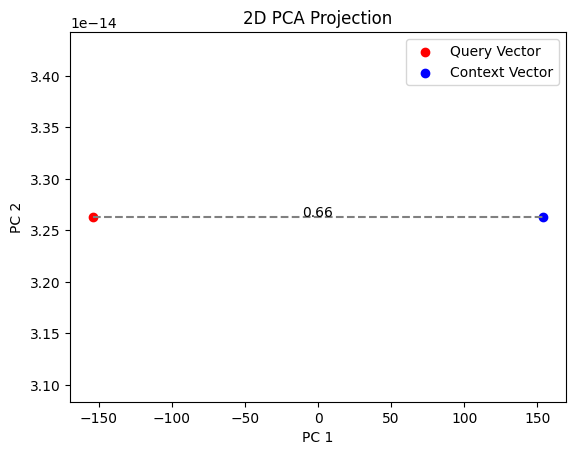

In [44]:
# Stack into shape (n_samples, n_features)
X = np.vstack([query_vector, context_vector])  # add more vectors to this list as needed

# PCA to reduce to 2 components (since we only have 2 samples)
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

# Plot the result in 2D
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X2[0, 0], X2[0, 1], color='red', label='Query Vector')
ax.scatter(X2[1, 0], X2[1, 1], color='blue', label='Context Vector')

# Draw a dashed line to the closest question
ax.plot([X2[0, 0], X2[1, 0]], [X2[0, 1], X2[1, 1]], linestyle='--', color='gray')

# Add cosine similarity distance as text above the dashed line
mid_x = (X2[0, 0] + X2[1, 0]) / 2
mid_y = (X2[0, 1] + X2[1, 1]) / 2
cosine_distance = cosine_similarity(X[0].reshape(1, -1), X[1].reshape(1, -1))[0, 0]
ax.text(mid_x, mid_y, f'{cosine_distance:.2f}', fontsize=10, color='black', ha='center')

# Add labels and title
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('2D PCA Projection')
ax.legend()

# Show the plot
plt.show()

In [40]:
query = 'What town did Beyonce go to school in?'
query_vector = np.array(get_embedding(query))
question_1 = '''1. What elementary school did Beyoncé attend in Fredericksburg, Texas?'''
question_1_vector = np.array(get_embedding(question_1))
question_2 = '''2. Where was Beyoncé's singing talent discovered?'''
question_2_vector = np.array(get_embedding(question_2))
question_3 = '''3. At what age did Beyoncé win a school talent show and what song did she sing?'''
question_3_vector = np.array(get_embedding(question_3))
question_4 = '''4. In which city did Beyoncé enroll in a music magnet school after leaving St. Mary's Elementary School?'''
question_4_vector = np.array(get_embedding(question_4))
question_5 = '''5. Where was Beyoncé a member of the choir for two years as a soloist?'''
question_5_vector = np.array(get_embedding(question_5))
context_vector = np.array(get_embedding(context))


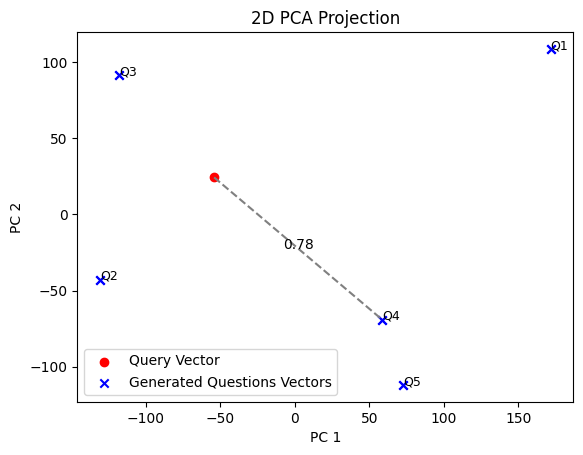

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

X = np.vstack([query_vector, question_1_vector, question_2_vector, question_3_vector, question_4_vector, question_5_vector])
# Calculate cosine similarity between the query vector and all question vectors
cosine_similarities = cosine_similarity(X[0].reshape(1, -1), X[1:])
closest_idx = np.argmax(cosine_similarities) + 1  # Add 1 to account for query_vector being at index 0

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

# Plot the result in 2D
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the query_vector in a different color
ax.scatter(X2[0, 0], X2[0, 1], color='red', label='Query Vector', marker='o')
ax.scatter(X2[1:, 0], X2[1:, 1], color='blue', label='Generated Questions Vectors', marker='x')

# Plot the rest of the vectors and label them
for i in range(1, len(X2)):
    ax.scatter(X2[i, 0], X2[i, 1], color='blue', marker='x')
    ax.text(X2[i, 0], X2[i, 1], f'Q{i}', fontsize=9, ha='left')

# Draw a dashed line to the closest question
ax.plot([X2[0, 0], X2[closest_idx, 0]], [X2[0, 1], X2[closest_idx, 1]], linestyle='--', color='gray')

# Add cosine similarity distance as text above the dashed line
mid_x = (X2[0, 0] + X2[closest_idx, 0]) / 2
mid_y = (X2[0, 1] + X2[closest_idx, 1]) / 2
cosine_distance = cosine_similarities[0, closest_idx - 1]  # Adjust index for cosine_similarities
ax.text(mid_x, mid_y, f'{cosine_distance:.2f}', fontsize=10, color='black', ha='center')

# Add labels and title
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('2D PCA Projection')
ax.legend()

# Show the plot
plt.show()